## Lab 1 - Decision Tree


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Load iris data set


In [3]:
# Load the Mushroom dataset from the local folder
import pandas as pd
column_names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
               'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
               'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
               'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
mushroom_df = pd.read_csv('/content/drive/MyDrive/475/agaricus-lepiota.data', header=None, names=column_names)


Analyze the dataset


(8124, 23)
       class cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4

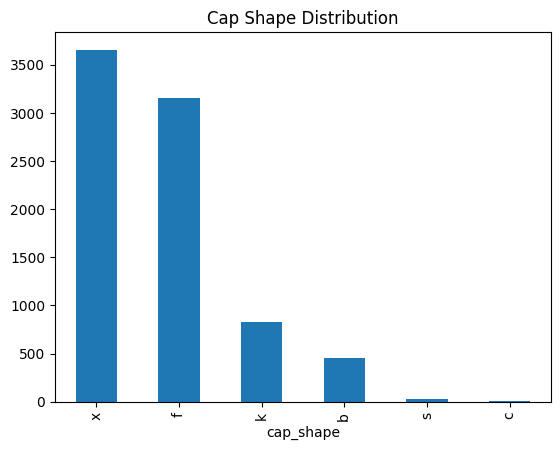

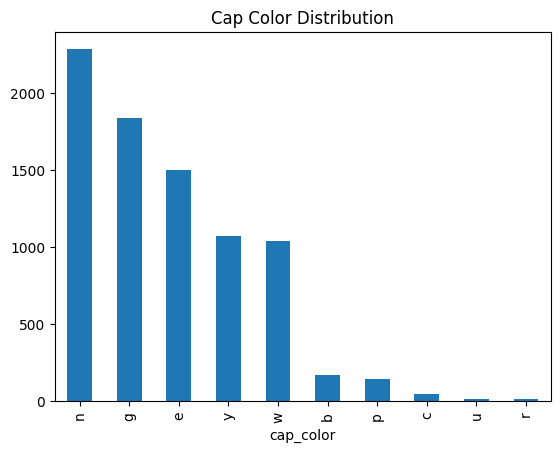

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


print(mushroom_df.shape)
print(mushroom_df.describe(include='all'))


print(mushroom_df['class'].value_counts())

mushroom_df['cap_shape'].value_counts().plot(kind='bar', title='Cap Shape Distribution')
plt.show()

mushroom_df['cap_color'].value_counts().plot(kind='bar', title='Cap Color Distribution')
plt.show()



Split the dataset into train and test. Fix the error in below code


In [12]:
# Define the features and the target
X = mushroom_df.drop('class', axis=1)
y = mushroom_df['class']


X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6499, 22)
X_test shape: (1625, 22)
y_train shape: (6499,)
y_test shape: (1625,)


Train and test


In [13]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the train data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get a more detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       843
           1       0.93      0.98      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



Show the results


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-score: 0.95
Classification Report:
              precision    recall  f1-score   support

   Poisonous       0.98      0.93      0.95       843
      Edible       0.93      0.98      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



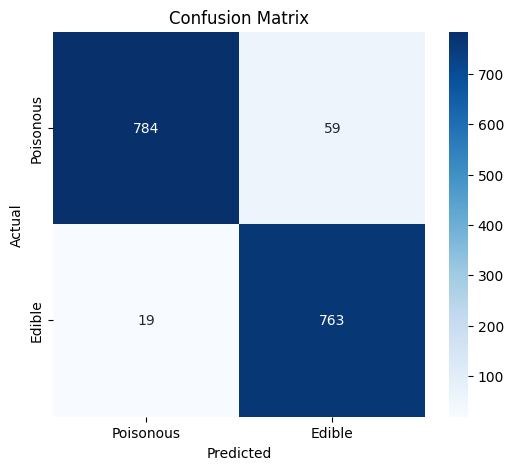

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the accuracy, precision, recall, and f1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion matrix calculation
cm = confusion_matrix(y_test, y_pred)



# Print the detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Poisonous', 'Edible']))

# Plotting the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Plot the tree


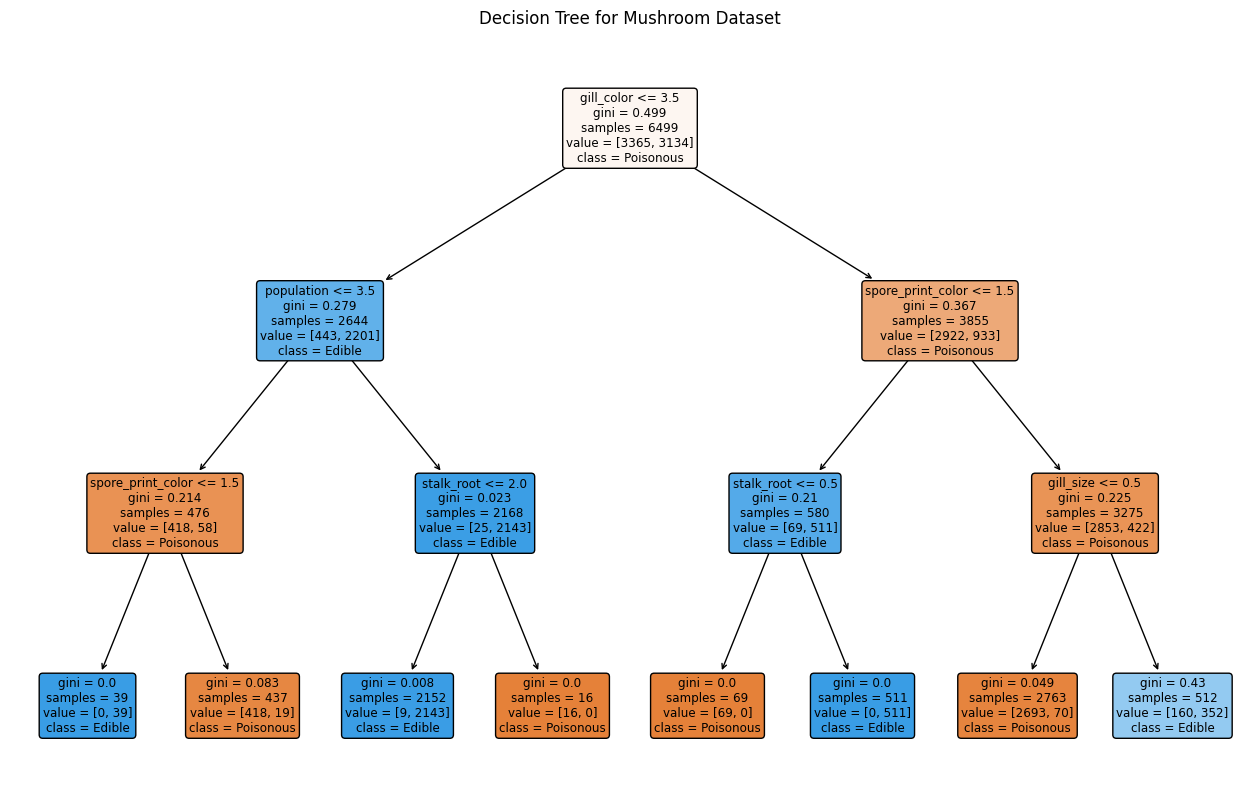

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(16, 10))


plot_tree(dt,
          feature_names=X.columns,
          class_names=['Poisonous', 'Edible'],
          filled=True,
          rounded=True)

plt.title('Decision Tree for Mushroom Dataset')
plt.show()


# Random Forest


In [20]:
# Load the Mushroom dataset from the local folder
import pandas as pd
column_names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
               'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
               'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
               'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
mushroom_df = pd.read_csv('/content/drive/MyDrive/475/agaricus-lepiota.data', header=None, names=column_names)


In [21]:
# Define the features and the target
X = mushroom_df.drop('class', axis=1)
y = mushroom_df['class']


X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6499, 22)
X_test shape: (1625, 22)
y_train shape: (6499,)
y_test shape: (1625,)


In [22]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Poisonous', 'Edible'])
print(f"Accuracy: {accuracy:.2f}")

# Print the detailed classification report
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00       843
      Edible       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



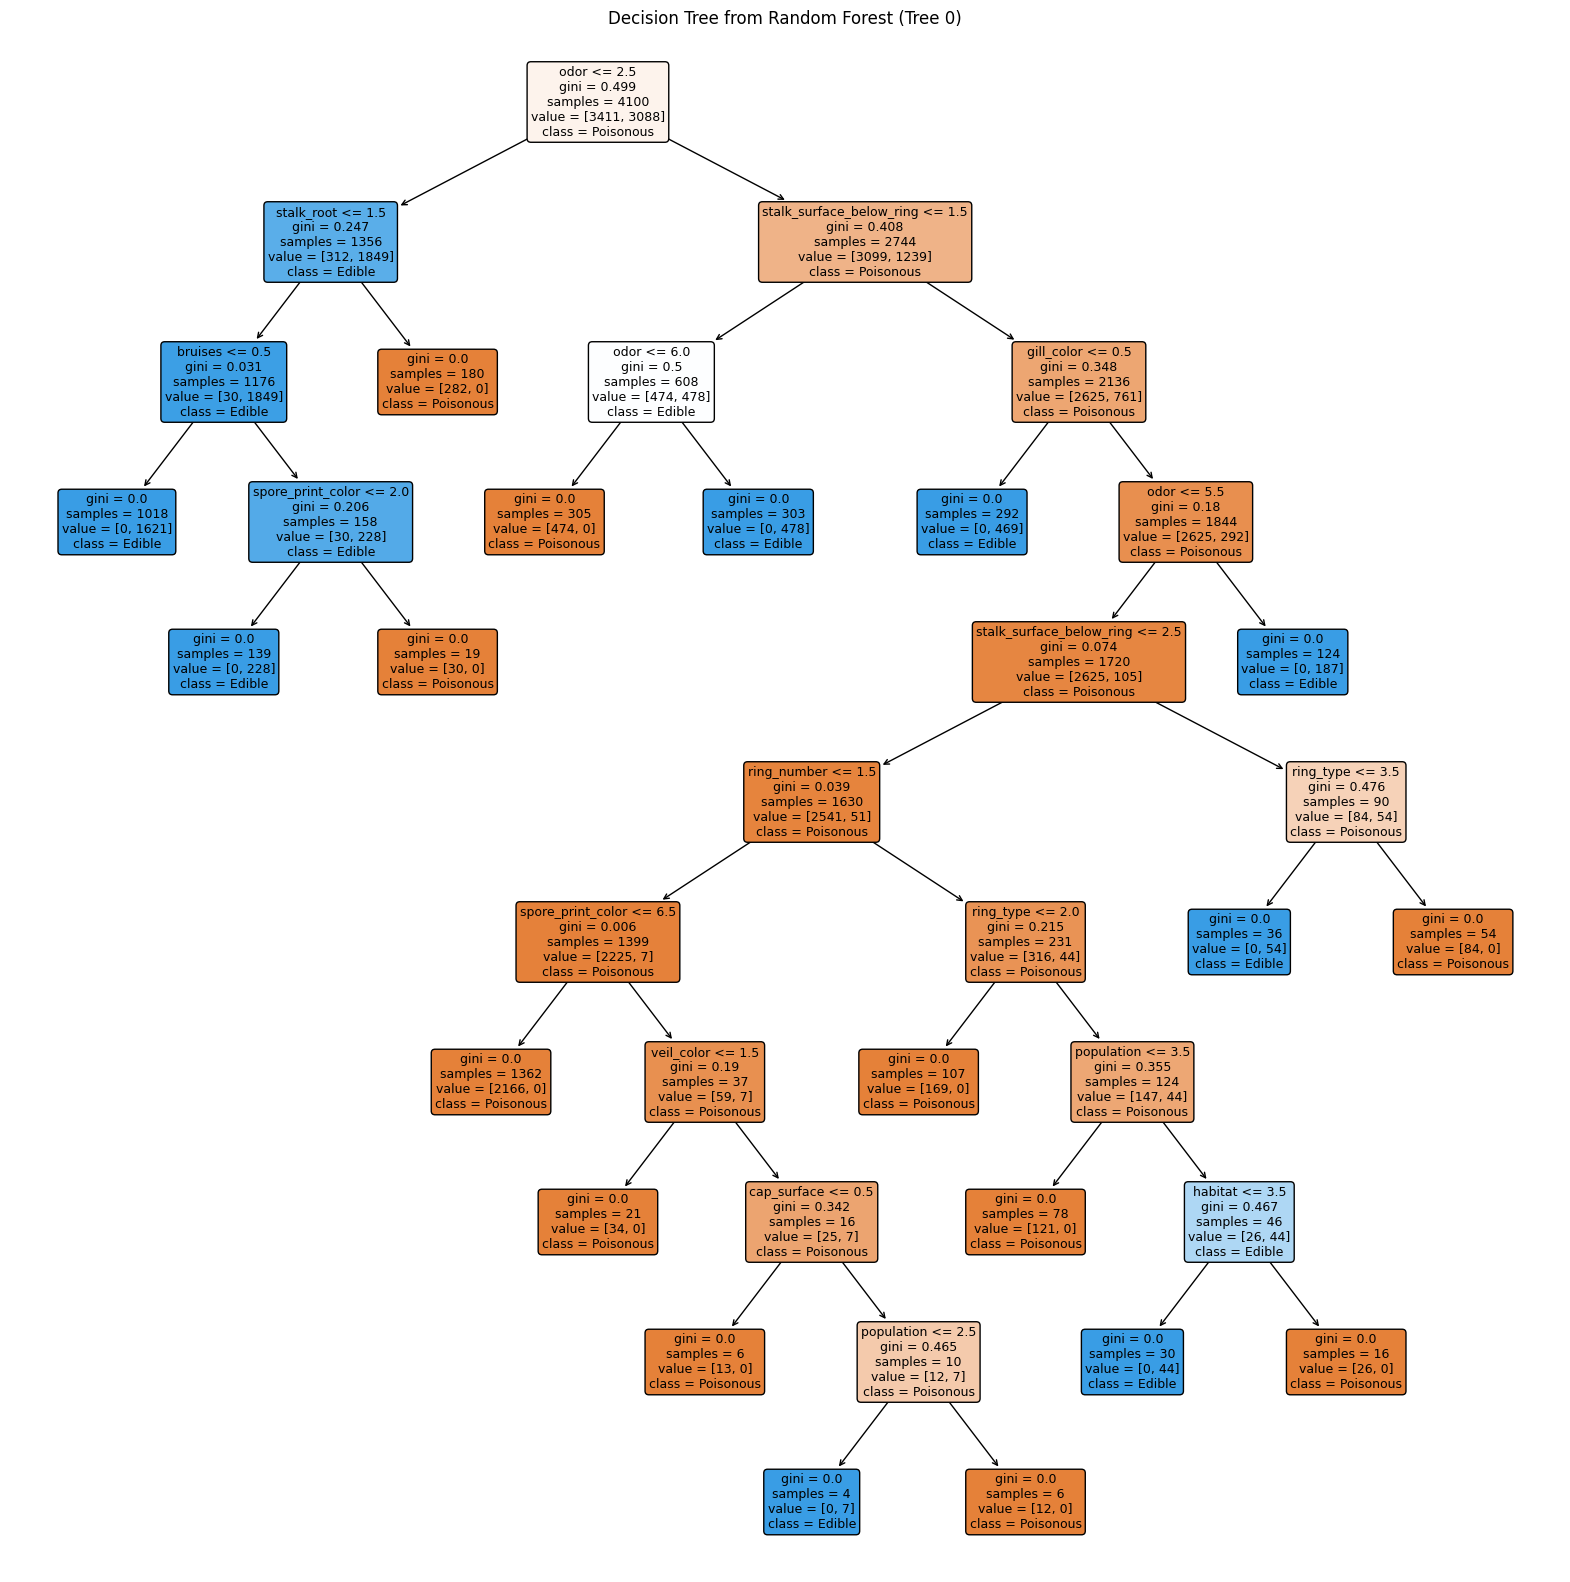

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot one of the decision trees in the Random Forest
plt.figure(figsize=(20, 20))
_ = tree.plot_tree(rf_classifier.estimators_[0],
                   feature_names=X.columns,
                   filled=True,
                   rounded=True,
                   class_names=['Poisonous', 'Edible'])
plt.title("Decision Tree from Random Forest (Tree 0)")
plt.show()


Classify Mushroom Using Decision Tree and Random Forest.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Submit:

1.  Submit your github link.
2.  Perform Exploratory Data Analysis (EDA) on the dataset.
3.  Evaluate and compare Random Forest tree accuracy for the folowing n_estimators values 1,50,100,150,200, and 250.
4.  Evaluate and compare performance of Random Forest and Decision Tree.
5.  Submit a report of EDA and results of tasks 3 and 4.
